# EPS-MDS - Preparando os dados para o Analytics

Esse caderno Jupyter automatiza o processo de obtenção das medidas das métricas do software dos repositórios analisados pelo SonarCloud. Eles são obtidos a partir da API do SonarCloud. A documentação completa da API encontra-se no link abaixo.

https://sonarcloud.io/web_api

Caso você tenha mais de um repositório a coletar as medidas das métricas, basta duplicar esse caderno, preencher a chave e as métricas que deseja requisitar e rodar todas as células.

## Informando a chave e as métricas a serem requisitadas

### Informando a chave do projeto no SonarCloud

Entre na dashboard do projeto que você deseja coletar as medidas das métricas, copie a chave do projeto (Project Key), conforme imagem abaixo, e preencha no lugar da chave de exemplo que se encontra armazenado na variável "chave".

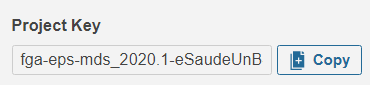

In [1]:
chave = 'fga-eps-mds_2020.1-eSaudeUnB-FrontEnd'

### Informando a lista de métricas a serem coletadas

Preencha a lista colocando os nomes das métricas entre aspas. Não esqueça de colocar as vírgulas separando as métricas.

In [2]:
metrics_list = [
    'complexity',
    'functions',
    'files',
    'comment_lines_density',
    'duplicated_lines_density',
    'coverage',
    'sqale_rating',
    'test_success_density',
    'bugs',
    'open_issues',
    'reliability_rating',
    'vulnerabilities',
    'security_rating'
]
len(metrics_list)

13

### Montando a string da lista de métricas e as URLs das requisições da API

In [3]:
string_metricKeys = ''
for metric in metrics_list:
    string_metricKeys += metric + ','
string_metricKeys

'complexity,functions,files,comment_lines_density,duplicated_lines_density,coverage,sqale_rating,test_success_density,bugs,open_issues,reliability_rating,vulnerabilities,security_rating,'

In [4]:
url = f"https://sonarcloud.io/api/measures/component_tree?component={chave}&metricKeys={string_metricKeys}&ps=500"

## Importando os pacotes necessários

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import json

In [8]:
import urllib3
from urllib3 import request

## Realizando a requisição das métricas na API do SonarCloud

### Instanciando a conexão

In [9]:
http = urllib3.PoolManager()

### Realizando as requisições

In [10]:
data = http.request('GET', url)
data.status

200

### Decodificando os arquivos recebidos

In [11]:
json_repositorio = json.loads(data.data.decode('utf-8'))
json_repositorio

{'paging': {'pageIndex': 1, 'pageSize': 500, 'total': 91},
 'baseComponent': {'id': 'AXXSYIjVCa2gkaXKiXuK',
  'key': 'fga-eps-mds_2020.1-eSaudeUnB-FrontEnd',
  'name': '2020.1-eSaudeUnB-FrontEnd',
  'qualifier': 'TRK',
  'measures': [{'metric': 'duplicated_lines_density',
    'value': '4.4',
    'bestValue': False},
   {'metric': 'functions', 'value': '255'},
   {'metric': 'sqale_rating', 'value': '1.0', 'bestValue': True},
   {'metric': 'security_rating', 'value': '1.0', 'bestValue': True},
   {'metric': 'files', 'value': '66'},
   {'metric': 'complexity', 'value': '539'},
   {'metric': 'bugs', 'value': '9', 'bestValue': False},
   {'metric': 'coverage', 'value': '23.0', 'bestValue': False},
   {'metric': 'reliability_rating', 'value': '4.0', 'bestValue': False},
   {'metric': 'comment_lines_density', 'value': '0.2', 'bestValue': False},
   {'metric': 'vulnerabilities', 'value': '0', 'bestValue': True},
   {'metric': 'open_issues', 'value': '68', 'bestValue': False}]},
 'components': 

### Salvando os arquivos localmente

Caso queira salvar localmente o JSON recebido na requisição, descomente as linhas de código da célula abaixo.

In [12]:
# with open('fga-eps-mds_2020.1-eSaudeUnB-FrontEnd-R2.json', 'w') as outfile:
    # json.dump(json_repositorio, outfile)

## Manipulação dos dados recebidos

Para realizar a requisição dos dados do projeto e dos arquivos dele, utilizamos o endpoint "api/measures/component_tree". Ele retorna um JSON com os dados do projeto, que se encontra no "baseComponent", e de cada um dos arquivos do projeto, que se encontram na lista "components".

### Métricas do projeto

#### Separando as métricas do projeto

In [13]:
json_projeto = json_repositorio['baseComponent']
json_projeto

{'id': 'AXXSYIjVCa2gkaXKiXuK',
 'key': 'fga-eps-mds_2020.1-eSaudeUnB-FrontEnd',
 'name': '2020.1-eSaudeUnB-FrontEnd',
 'qualifier': 'TRK',
 'measures': [{'metric': 'duplicated_lines_density',
   'value': '4.4',
   'bestValue': False},
  {'metric': 'functions', 'value': '255'},
  {'metric': 'sqale_rating', 'value': '1.0', 'bestValue': True},
  {'metric': 'security_rating', 'value': '1.0', 'bestValue': True},
  {'metric': 'files', 'value': '66'},
  {'metric': 'complexity', 'value': '539'},
  {'metric': 'bugs', 'value': '9', 'bestValue': False},
  {'metric': 'coverage', 'value': '23.0', 'bestValue': False},
  {'metric': 'reliability_rating', 'value': '4.0', 'bestValue': False},
  {'metric': 'comment_lines_density', 'value': '0.2', 'bestValue': False},
  {'metric': 'vulnerabilities', 'value': '0', 'bestValue': True},
  {'metric': 'open_issues', 'value': '68', 'bestValue': False}]}

#### Gerando a lista de colunas

In [14]:
json_projeto_columns = []
for measure in json_projeto['measures']:
    json_projeto_columns.append(measure['metric'])
json_projeto_columns

['duplicated_lines_density',
 'functions',
 'sqale_rating',
 'security_rating',
 'files',
 'complexity',
 'bugs',
 'coverage',
 'reliability_rating',
 'comment_lines_density',
 'vulnerabilities',
 'open_issues']

#### Instanciando as tabelas

In [15]:
df_projeto = pd.DataFrame(columns = json_projeto_columns)
df_projeto

,duplicated_lines_density,functions,sqale_rating,security_rating,files,complexity,bugs,coverage,reliability_rating,comment_lines_density,vulnerabilities,open_issues


#### Populando as tabelas

In [16]:
for measure in json_projeto['measures']:
    df_projeto.at['projeto', measure['metric']] = measure['value']
df_projeto

,duplicated_lines_density,functions,sqale_rating,security_rating,files,complexity,bugs,coverage,reliability_rating,comment_lines_density,vulnerabilities,open_issues
projeto,4.4,255,1.0,1.0,66,539,9,23.0,4.0,0.2,0,68


### Métricas dos arquivos do projeto

Dentro da lista "components" existem tanto as métricas dos arquivos quanto dos diretórios que os contém. A diferença entre eles é dada pelo campo "qualifier". Quando ele é igual a "DIR", trata-se de um diretório e quando ele é igual a "FIL", trata-se de um arquivo (file). Desta forma, vamos criar uma nova lista apenas com os arquivos do projeto.

#### Separando apenas os arquivos

In [17]:
json_arquivos = []
for component in json_repositorio['components']:
    if component['qualifier'] == 'FIL':
        json_arquivos.append(component)
json_arquivos

[{'id': 'AXXSYQ8d2dMS7r1t1qT-',
  'key': 'fga-eps-mds_2020.1-eSaudeUnB-FrontEnd:src/services/api.js',
  'name': 'api.js',
  'qualifier': 'FIL',
  'path': 'src/services/api.js',
  'language': 'js',
  'measures': [{'metric': 'complexity', 'value': '0'},
   {'metric': 'functions', 'value': '0'},
   {'metric': 'sqale_rating', 'value': '1.0', 'bestValue': True},
   {'metric': 'coverage', 'value': '100.0', 'bestValue': True},
   {'metric': 'reliability_rating', 'value': '1.0', 'bestValue': True},
   {'metric': 'security_rating', 'value': '1.0', 'bestValue': True},
   {'metric': 'comment_lines_density', 'value': '0.0', 'bestValue': False},
   {'metric': 'files', 'value': '1'},
   {'metric': 'open_issues', 'value': '0', 'bestValue': True},
   {'metric': 'bugs', 'value': '0', 'bestValue': True},
   {'metric': 'test_success_density', 'value': '100.0', 'bestValue': True},
   {'metric': 'vulnerabilities', 'value': '0', 'bestValue': True},
   {'metric': 'duplicated_lines_density', 'value': '0.0', '

#### Gerando a lista de colunas

In [18]:
json_arquivos_columns = []
for measure in json_arquivos[0]['measures']:
    json_arquivos_columns.append(measure['metric'])
json_arquivos_columns

['complexity',
 'functions',
 'sqale_rating',
 'coverage',
 'reliability_rating',
 'security_rating',
 'comment_lines_density',
 'files',
 'open_issues',
 'bugs',
 'test_success_density',
 'vulnerabilities',
 'duplicated_lines_density']

#### Gerando a lista de linhas

In [19]:
json_arquivos_index = []
for file in json_arquivos:
    try:
        if file['language'] == 'js':
            json_arquivos_index.append(file['path'])
    except:
        pass
json_arquivos_index

['src/services/api.js',
 'src/App.js',
 'src/components/Footer.js',
 'src/index.js',
 'src/pages/PsychologistEvents/index.js',
 'src/pages/NewSession/index.js',
 'src/pages/PatientRecord/index.js',
 'src/pages/PsychologistCalendar/index.js',
 'src/pages/UserEvents/index.js',
 'src/pages/PsychologistList/index.js',
 'src/pages/PatientList/index.js',
 'src/pages/NotFound/index.js',
 'src/pages/PsychologistCreate/index.js',
 'src/pages/PsychologistSchedule/index.js',
 'src/pages/AdminMain/index.js',
 'src/pages/LoginAdmin/index.js',
 'src/pages/UserMain/index.js',
 'src/pages/Landing/index.js',
 'src/pages/LandingLogin/index.js',
 'src/pages/UserProfile/index.js',
 'src/pages/LandingSignUp/index.js',
 'src/pages/UserSchedule/index.js',
 'src/pages/PsychologistProfile/index.js',
 'src/pages/WaitingList/index.js',
 'src/components/Input.js',
 'src/components/LandingNavBar.js',
 'src/components/Loader.js',
 'src/components/Logo.js',
 'src/components/NavBar.js',
 'src/components/RealizeSearch

#### Instanciando as tabelas

In [20]:
df_arquivos = pd.DataFrame(columns = json_arquivos_columns, index = json_arquivos_index)
df_arquivos.head(10)

,complexity,functions,sqale_rating,coverage,reliability_rating,security_rating,comment_lines_density,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
src/services/api.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/App.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/components/Footer.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/pages/PsychologistEvents/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/pages/NewSession/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/pages/PatientRecord/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/pages/PsychologistCalendar/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/pages/UserEvents/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src/pages/PsychologistList/index.js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Populando as tabelas

In [21]:
for file in json_arquivos:
    try:
        if file['language'] == 'js':
            for measure in file['measures']:
                df_arquivos.at[file['path'], measure['metric']] = measure['value']
    except:
        pass
df_arquivos

,complexity,functions,sqale_rating,coverage,reliability_rating,security_rating,comment_lines_density,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
src/services/api.js,0,0,1.0,100.0,1.0,1.0,0.0,1,0,0,100.0,0,0.0
src/App.js,1,1,1.0,0.0,1.0,1.0,0.0,1,0,0,100.0,0,0.0
src/components/Footer.js,1,1,1.0,100.0,1.0,1.0,0.0,1,0,0,100.0,0,0.0
src/index.js,0,0,1.0,0.0,1.0,1.0,0.0,1,0,0,100.0,0,0.0
src/pages/PsychologistEvents/index.js,12,7,1.0,29.2,1.0,1.0,4.3,1,2,0,100.0,0,0.0
src/pages/NewSession/index.js,14,10,1.0,2.6,1.0,1.0,0.8,1,3,0,100.0,0,19.6
src/pages/PatientRecord/index.js,19,13,1.0,36.2,1.0,1.0,1.6,1,3,0,100.0,0,18.7
src/pages/PsychologistCalendar/index.js,45,24,1.0,8.2,4.0,1.0,0.3,1,7,1,100.0,0,0.0
src/pages/UserEvents/index.js,10,6,1.0,40.9,1.0,1.0,1.4,1,0,0,100.0,0,0.0
src/pages/PsychologistList/index.js,12,8,1.0,28.0,1.0,1.0,0.0,1,1,0,100.0,0,0.0
